In [2]:
import pandas as pd

# Leer el archivo csv
datos = pd.read_csv('datos_log.csv')

# Crear el dataframe con las columnas especificadas
logendogenas = pd.DataFrame(datos, columns=['loginflacion', 'logblue', 'logoficial', 'logbadlar', 'logemae', 'logm2', 'logmat_prim'])


In [3]:
# Crear un nuevo dataframe para almacenar las características desfasadas
lagged_df = pd.DataFrame()

# Agregar el target sin modificar
lagged_df['loginflacion'] = logendogenas['loginflacion']

# Agregar desfasajes para el target 'loginflacion'
for lag in range(1, 4):
    lagged_df[f'loginflacion_lag_{lag}'] = logendogenas['loginflacion'].shift(lag)

# Agregar desfasajes para las otras características (0 a 6)
features = ['logblue', 'logoficial', 'logbadlar', 'logemae', 'logm2', 'logmat_prim']
for feature in features:
    for lag in range(0, 7):
        lagged_df[f'{feature}_lag_{lag}'] = logendogenas[feature].shift(lag)

# Eliminar filas con valores NaN debido a los desfasajes
lagged_df = lagged_df.dropna().reset_index(drop=True)


               Feature  Importance
9        logblue_lag_6    0.071785
0   loginflacion_lag_1    0.068707
33         logm2_lag_2    0.065501
34         logm2_lag_3    0.058755
13    logoficial_lag_3    0.056524
8        logblue_lag_5    0.049987
15    logoficial_lag_5    0.046999
35         logm2_lag_4    0.046254
6        logblue_lag_3    0.045138
1   loginflacion_lag_2    0.041531
36         logm2_lag_5    0.040080
3        logblue_lag_0    0.037557
37         logm2_lag_6    0.036987
2   loginflacion_lag_3    0.034592
16    logoficial_lag_6    0.034473
11    logoficial_lag_1    0.032671
7        logblue_lag_4    0.031621
4        logblue_lag_1    0.030214
10    logoficial_lag_0    0.027759
17     logbadlar_lag_0    0.023766
14    logoficial_lag_4    0.021790
12    logoficial_lag_2    0.021244
5        logblue_lag_2    0.018573
19     logbadlar_lag_2    0.015861
31         logm2_lag_0    0.014322
32         logm2_lag_1    0.011680
21     logbadlar_lag_4    0.008432
43   logmat_prim_lag

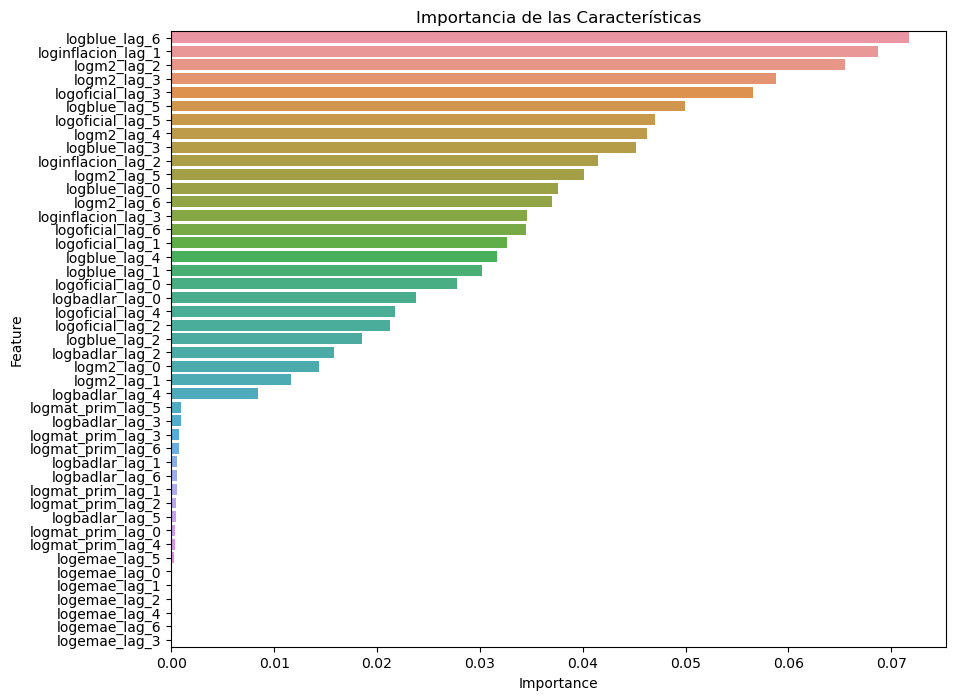

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Separar características y objetivo
X = lagged_df.drop(columns=['loginflacion'])
y = lagged_df['loginflacion']

# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Random Forest
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
model.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importances = model.feature_importances_
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
# feature_importances_valores = pd.DataFrame({

#     'Importance': feature_importances
# }).sort_values(by='Importance', ascending=False)

# Imprimir la importancia de las características
print(feature_importances_df)
#print(feature_importances_valores)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importances_df, x='Importance', y='Feature')
plt.title('Importancia de las Características')
plt.show()


In [7]:
# Seleccionar características cuya importancia acumulada suma 95%
cumulative_importance = feature_importances_df['Importance'].cumsum()
top_features = feature_importances_df[cumulative_importance <= 0.95]['Feature'].tolist()
if cumulative_importance.iloc[len(top_features)] <= 0.95:
    top_features.append(feature_importances_df.iloc[len(top_features)]['Feature'])

# Crear un nuevo DataFrame con las características seleccionadas
df_top_features = lagged_df[['loginflacion'] + top_features]

#print(df_top_features)

In [9]:
df_top_features

,loginflacion,logblue_lag_6,loginflacion_lag_1,logm2_lag_2,logm2_lag_3,logoficial_lag_3,logblue_lag_5,logoficial_lag_5,logm2_lag_4,logblue_lag_3,...,loginflacion_lag_3,logoficial_lag_6,logoficial_lag_1,logblue_lag_4,logblue_lag_1,logoficial_lag_0,logbadlar_lag_0,logoficial_lag_4,logoficial_lag_2,logblue_lag_2
0,4.639765,1.067606,4.635214,18.160543,18.106977,1.042320,1.076485,1.075514,18.069900,1.044799,...,4.622224,1.062409,1.085028,1.069389,1.086957,1.083579,1.162965,1.063961,1.071070,1.072923
1,4.643236,1.076485,4.639765,18.211110,18.160543,1.071070,1.069389,1.063961,18.106977,1.072923,...,4.629570,1.075514,1.083579,1.044799,1.086154,1.103205,1.432814,1.042320,1.085028,1.086957
2,4.649474,1.069389,4.643236,18.240352,18.211110,1.085028,1.044799,1.042320,18.160543,1.086957,...,4.635214,1.063961,1.103205,1.072923,1.104941,1.096792,1.492010,1.071070,1.083579,1.086154
3,4.653389,1.044799,4.649474,18.247459,18.240352,1.083579,1.072923,1.071070,18.211110,1.086154,...,4.639765,1.042320,1.096792,1.086957,1.101034,1.088394,1.477334,1.085028,1.103205,1.104941
4,4.653484,1.072923,4.653389,18.234998,18.247459,1.103205,1.086957,1.085028,18.240352,1.104941,...,4.643236,1.071070,1.088394,1.086154,1.090564,1.083345,1.416377,1.083579,1.096792,1.101034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,8.055669,3.638931,8.040573,21.862880,21.842207,3.766596,3.631714,3.648318,21.822241,3.778425,...,7.983921,3.621877,3.779405,3.713123,3.791286,3.750568,3.884138,3.722391,3.805197,3.815712
181,8.102305,3.631714,8.055669,21.858823,21.862880,3.805197,3.713123,3.722391,21.842207,3.815712,...,8.018075,3.648318,3.750568,3.778425,3.766612,3.965139,4.015364,3.766596,3.779405,3.791286
182,8.162302,3.713123,8.102305,21.892666,21.858823,3.779405,3.778425,3.766596,21.862880,3.791286,...,8.040573,3.722391,3.965139,3.815712,3.978078,4.034274,4.093551,3.805197,3.750568,3.766612
183,8.191563,3.778425,8.162302,21.957756,21.892666,3.750568,3.815712,3.805197,21.858823,3.766612,...,8.055669,3.766596,4.034274,3.791286,4.081263,4.069547,4.009552,3.779405,3.965139,3.978078


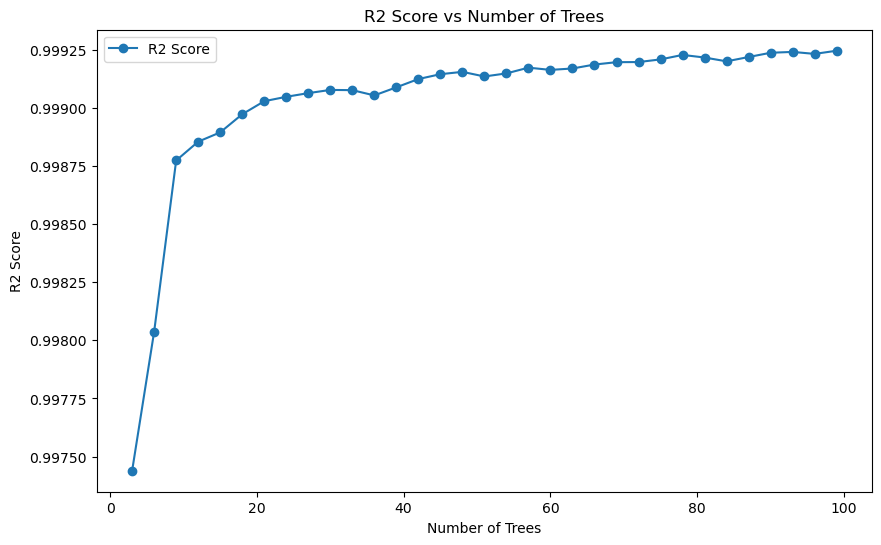

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Espacio de parámetros
params = {
    'sample_size_ratio': 2/3,  # Cantidad de datos de muestreo (2/3 del total)
    'validation_size_ratio': 0.2,  # Cantidad de datos de validación (20% del total de datos)
    'n_estimators': 100,  # Número de árboles en el random forest
    'random_state': 42,  # Semilla para la reproducibilidad
    'max_depth': None,  # Profundidad máxima de los árboles
    'min_samples_leaf': 1,  # Número mínimo de muestras por hoja
    'n_splits': 5  # Número de splits para bootstrapping
}

# Separar características y objetivo
X = df_top_features.drop(columns=['loginflacion'])
y = df_top_features['loginflacion']

# Dividir el conjunto de datos en entrenamiento y validación
X_train_full, X_val, y_train_full, y_val = train_test_split(X, y, test_size=params['validation_size_ratio'], random_state=params['random_state'])

# Función para realizar el muestreo con bootstrapping y entrenamiento del modelo
def train_random_forest(params, X_train_full, y_train_full, X_val, y_val):
    r2_scores = []
    total_indices = set(X_train_full.index)
    selected_indices = set()

    for i in range(params['n_splits']):
        # Muestreo aleatorio con bootstrapping
        sample_size = int(len(X_train_full) * params['sample_size_ratio'])
        X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=sample_size, random_state=params['random_state'] + i, shuffle=True)
        
        # Registrar los índices seleccionados
        selected_indices.update(X_train.index)
        
        # Entrenar el modelo
        model = RandomForestRegressor(
            n_estimators=params['n_estimators'],
            random_state=params['random_state'],
            max_depth=params['max_depth'],
            min_samples_leaf=params['min_samples_leaf']
        )
        
        # Entrenar el modelo
        model.fit(X_train, y_train)
        
        # Predicción
        y_pred = model.predict(X_val)
        
        # Calcular R2 y almacenar
        r2 = r2_score(y_val, y_pred)
        r2_scores.append(r2)

    return r2_scores, selected_indices

# Función para graficar error vs número de árboles
def plot_error_vs_trees(params, X_train_full, y_train_full, X_val, y_val):
    n_trees = list(range(3, params['n_estimators'] + 1, 3))
    r2_scores = []

    for n in n_trees:
        params['n_estimators'] = n
        r2, _ = train_random_forest(params, X_train_full, y_train_full, X_val, y_val)
        r2_scores.append(np.mean(r2))

    # Gráfico de R2 Score vs Número de Árboles
    plt.figure(figsize=(10, 6))
    plt.plot(n_trees, r2_scores, marker='o', label='R2 Score')
    plt.xlabel('Number of Trees')
    plt.ylabel('R2 Score')
    plt.title('R2 Score vs Number of Trees')
    plt.legend()
    plt.show()

# Ejecutar y visualizar los gráficos
plot_error_vs_trees(params, X_train_full, y_train_full, X_val, y_val)


Train MSE: 0.000911956749230459
Validation MSE: 0.42443825941609026
Train R^2: 0.9984337535633387
Validation R^2: -3.146063359945132


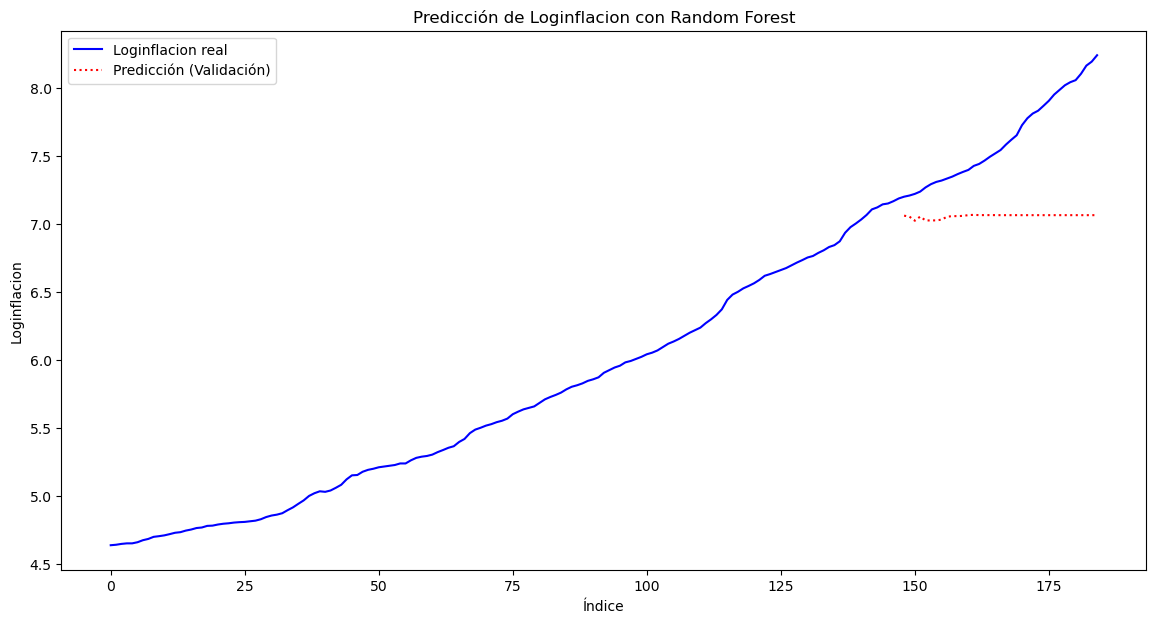

In [53]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Espacio de parámetros
params = {
    'train_size_ratio': 0.8,  # Cantidad de datos de entrenamiento (80% del total)
    'sample_size_ratio': 1/3,  # Cantidad de datos de muestreo (2/3 del total de entrenamiento)
    'validation_size_ratio': 0.2,  # Cantidad de datos de validación (20% del total de datos)
    'n_estimators': 200,  # Número de árboles en el random forest
    'random_state': 42,  # Semilla para la reproducibilidad
    'max_depth': 30,  # Profundidad máxima de los árboles
    'min_samples_leaf': 1,  # Número mínimo de muestras por hoja
    'n_splits': 500,  # Número de splits para bootstrapping
    'criterion': 'squared_error'  # Criterio de selección de los árboles ('mse' para regresión)
}

# Cargar datos

X = df_top_features.drop(columns=['loginflacion'])
y = df_top_features['loginflacion']

# Dividir los datos en entrenamiento y validación
train_size = int(len(df_top_features) * params['train_size_ratio'])
X_train, X_valid = X[:train_size], X[train_size:]
y_train, y_valid = y[:train_size], y[train_size:]

# Modelo de Random Forest
rf = RandomForestRegressor(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    min_samples_leaf=params['min_samples_leaf'],
    random_state=params['random_state'],
    criterion=params['criterion']
)

# Entrenamiento con bootstrapping
bootstrapped_indices = np.random.choice(
    range(len(X_train)), 
    size=int(len(X_train) * params['sample_size_ratio']), 
    replace=True
)
X_train_bootstrap = X_train.iloc[bootstrapped_indices]
y_train_bootstrap = y_train.iloc[bootstrapped_indices]

rf.fit(X_train_bootstrap, y_train_bootstrap)

# Predicciones
y_train_pred = rf.predict(X_train)
y_valid_pred = rf.predict(X_valid)

# Evaluaciones
train_mse = mean_squared_error(y_train, y_train_pred)
valid_mse = mean_squared_error(y_valid, y_valid_pred)
train_r2 = r2_score(y_train, y_train_pred)
valid_r2 = r2_score(y_valid, y_valid_pred)

print(f'Train MSE: {train_mse}')
print(f'Validation MSE: {valid_mse}')
print(f'Train R^2: {train_r2}')
print(f'Validation R^2: {valid_r2}')

# Graficar
plt.figure(figsize=(14, 7))
plt.plot(df_top_features.index, y, label='Loginflacion real', color='blue')
plt.plot(X_valid.index, y_valid_pred, label='Predicción (Validación)', color='red', linestyle='dotted')
plt.xlabel('Índice')
plt.ylabel('Loginflacion')
plt.title('Predicción de Loginflacion con Random Forest')
plt.legend()
plt.show()


Train MSE: 4.404462711583408e-05
Validation MSE: 0.0002262006386280632
Train R^2: 0.9999243552500352
Validation R^2: 0.9977903919851565


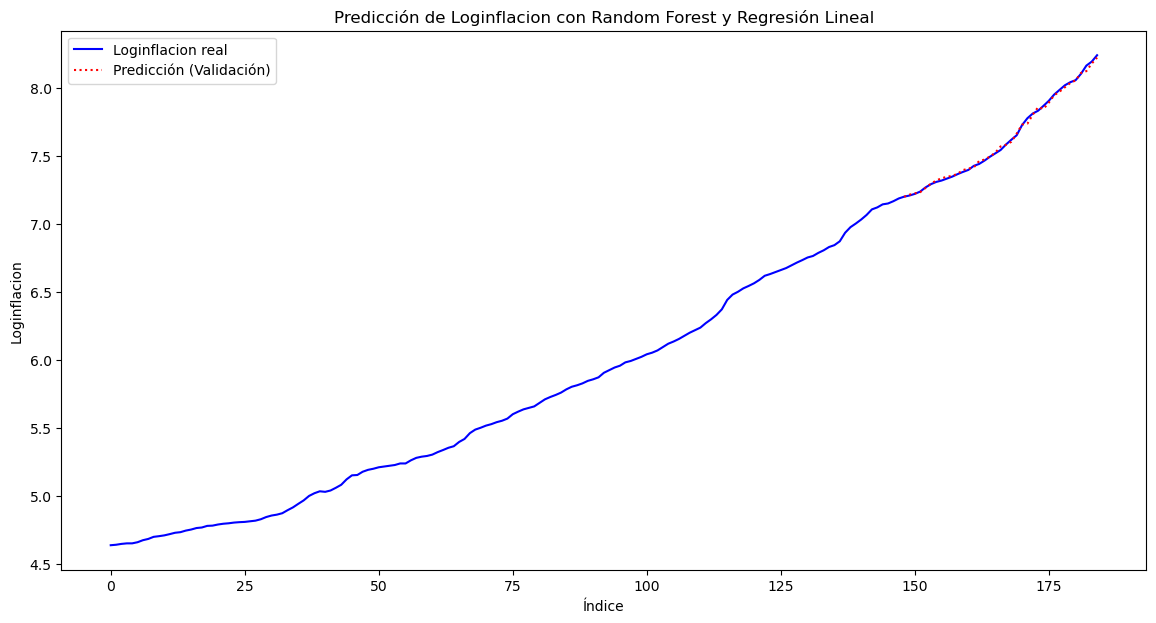

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Espacio de parámetros
params = {
    'train_size_ratio': 0.8,  # Cantidad de datos de entrenamiento (80% del total)
    'sample_size_ratio': 1/3,  # Cantidad de datos de muestreo (2/3 del total de entrenamiento)
    'validation_size_ratio': 0.2,  # Cantidad de datos de validación (20% del total de datos)
    'n_estimators': 3,  # Número de árboles en el random forest
    'random_state': 42,  # Semilla para la reproducibilidad
    'max_depth': 3,  # Profundidad máxima de los árboles
    'min_samples_leaf': 1,  # Número mínimo de muestras por hoja
    'n_splits': 2,  # Número de splits para bootstrapping
    'criterion': 'squared_error' # Criterio de selección de los árboles ('mse' para regresión)
}

# Cargar datos

X = df_top_features.drop(columns=['loginflacion'])
y = df_top_features['loginflacion']

# Dividir los datos en entrenamiento y validación
train_size = int(len(df_top_features) * params['train_size_ratio'])
X_train, X_valid = X[:train_size], X[train_size:]
y_train, y_valid = y[:train_size], y[train_size:]

# Ajustar regresión lineal al conjunto de entrenamiento
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Obtener predicciones de la regresión lineal
y_train_lin_pred = lin_reg.predict(X_train)
y_valid_lin_pred = lin_reg.predict(X_valid)

# Almacenar las predicciones del modelo
train_predictions = np.zeros((params['n_splits'], len(X_train)))
valid_predictions = np.zeros((params['n_splits'], len(X_valid)))

# Realizar múltiples muestreos bootstrapping y entrenar el modelo
for i in range(params['n_splits']):
    bootstrapped_indices = np.random.choice(
        range(len(X_train)), 
        size=int(len(X_train) * params['sample_size_ratio']), 
        replace=True
    )
    X_train_bootstrap = X_train.iloc[bootstrapped_indices]
    y_train_bootstrap = y_train.iloc[bootstrapped_indices] - y_train_lin_pred[bootstrapped_indices]

    rf = RandomForestRegressor(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        min_samples_leaf=params['min_samples_leaf'],
        random_state=params['random_state'],
        criterion=params['criterion']
    )

    rf.fit(X_train_bootstrap, y_train_bootstrap)
    train_predictions[i] = rf.predict(X_train) + y_train_lin_pred
    valid_predictions[i] = rf.predict(X_valid) + y_valid_lin_pred

# Promediar las predicciones de todos los modelos
y_train_pred = train_predictions.mean(axis=0)
y_valid_pred = valid_predictions.mean(axis=0)

# Evaluaciones
train_mse = mean_squared_error(y_train, y_train_pred)
valid_mse = mean_squared_error(y_valid, y_valid_pred)
train_r2 = r2_score(y_train, y_train_pred)
valid_r2 = r2_score(y_valid, y_valid_pred)

print(f'Train MSE: {train_mse}')
print(f'Validation MSE: {valid_mse}')
print(f'Train R^2: {train_r2}')
print(f'Validation R^2: {valid_r2}')

# Graficar
plt.figure(figsize=(14, 7))
plt.plot(df_top_features.index, y, label='Loginflacion real', color='blue')
plt.plot(X_valid.index, y_valid_pred, label='Predicción (Validación)', color='red', linestyle='dotted')
plt.xlabel('Índice')
plt.ylabel('Loginflacion')
plt.title('Predicción de Loginflacion con Random Forest y Regresión Lineal')
plt.legend()
plt.show()


Train MSE: 4.052490590972079e-05
Validation MSE: 0.00022132332921008895
Train R^2: 0.999930400219604
Validation R^2: 0.9978380352723116


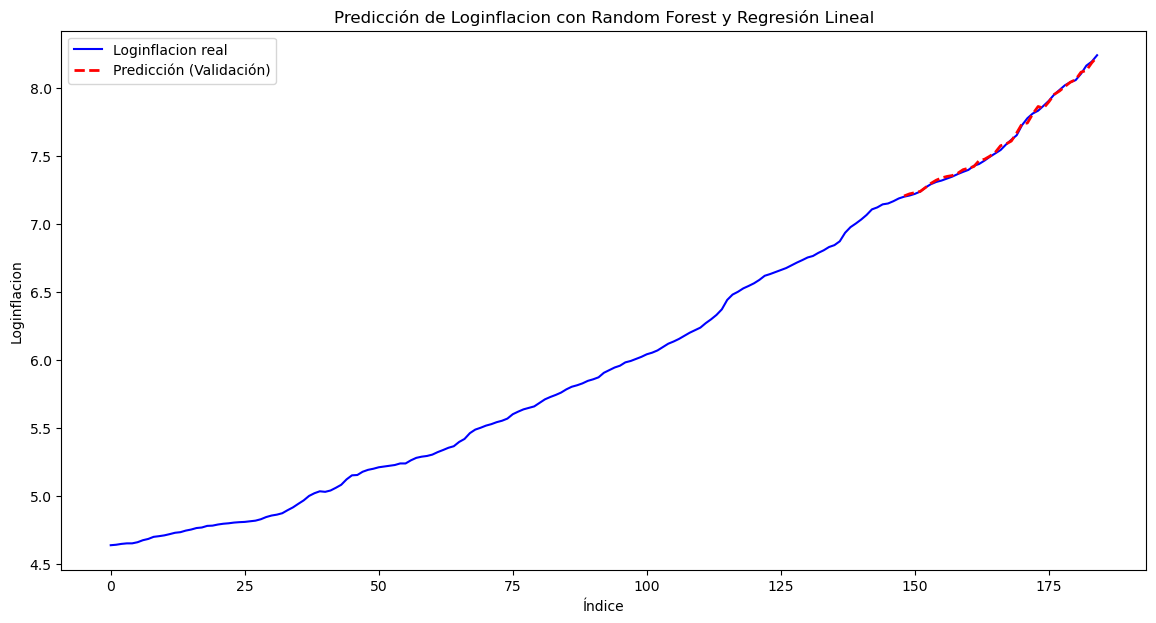

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Espacio de parámetros
params = {
    'train_size_ratio': 0.8,  # Cantidad de datos de entrenamiento (80% del total)
    'sample_size_ratio': 2/3,  # Cantidad de datos de muestreo (2/3 del total de entrenamiento)
    'validation_size_ratio': 0.2,  # Cantidad de datos de validación (20% del total de datos)
    'n_estimators': 10,  # Número de árboles en el random forest
    'random_state': 42,  # Semilla para la reproducibilidad
    'max_depth': 3,  # Profundidad máxima de los árboles
    'min_samples_split': 5,  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': 2,  # Número mínimo de muestras por hoja
    'n_splits': 5,  # Número de splits para bootstrapping
    'criterion': 'squared_error',  # Criterio de selección de los árboles ('mse' para regresión)
    'max_features': 'sqrt'  # Número de características a considerar para la mejor división
}

# Cargar datos

X = df_top_features.drop(columns=['loginflacion'])
y = df_top_features['loginflacion']

# Dividir los datos en entrenamiento y validación
train_size = int(len(df_top_features) * params['train_size_ratio'])
X_train, X_valid = X[:train_size], X[train_size:]
y_train, y_valid = y[:train_size], y[train_size:]

# Ajustar regresión lineal al conjunto de entrenamiento
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Obtener predicciones de la regresión lineal
y_train_lin_pred = lin_reg.predict(X_train)
y_valid_lin_pred = lin_reg.predict(X_valid)

# Almacenar las predicciones del modelo
train_predictions = np.zeros((params['n_splits'], len(X_train)))
valid_predictions = np.zeros((params['n_splits'], len(X_valid)))

# Realizar múltiples muestreos bootstrapping y entrenar el modelo
for i in range(params['n_splits']):
    bootstrapped_indices = np.random.choice(
        range(len(X_train)), 
        size=int(len(X_train) * params['sample_size_ratio']), 
        replace=True
    )
    X_train_bootstrap = X_train.iloc[bootstrapped_indices]
    y_train_bootstrap = y_train.iloc[bootstrapped_indices] - y_train_lin_pred[bootstrapped_indices]

    rf = RandomForestRegressor(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        random_state=params['random_state'],
        criterion=params['criterion'],
        max_features=params['max_features']
    )

    rf.fit(X_train_bootstrap, y_train_bootstrap)
    train_predictions[i] = rf.predict(X_train) + y_train_lin_pred
    valid_predictions[i] = rf.predict(X_valid) + y_valid_lin_pred

# Promediar las predicciones de todos los modelos
y_train_pred = train_predictions.mean(axis=0)
y_valid_pred = valid_predictions.mean(axis=0)

# Evaluaciones
train_mse = mean_squared_error(y_train, y_train_pred)
valid_mse = mean_squared_error(y_valid, y_valid_pred)
train_r2 = r2_score(y_train, y_train_pred)
valid_r2 = r2_score(y_valid, y_valid_pred)

print(f'Train MSE: {train_mse}')
print(f'Validation MSE: {valid_mse}')
print(f'Train R^2: {train_r2}')
print(f'Validation R^2: {valid_r2}')

# Graficar
plt.figure(figsize=(14, 7))
plt.plot(df_top_features.index, y, label='Loginflacion real', color='blue')
plt.plot(X_valid.index, y_valid_pred, label='Predicción (Validación)', color='red', linestyle='--', linewidth = 2)
plt.xlabel('Índice')
plt.ylabel('Loginflacion')
plt.title('Predicción de Loginflacion con Random Forest y Regresión Lineal')
plt.legend()
plt.show()


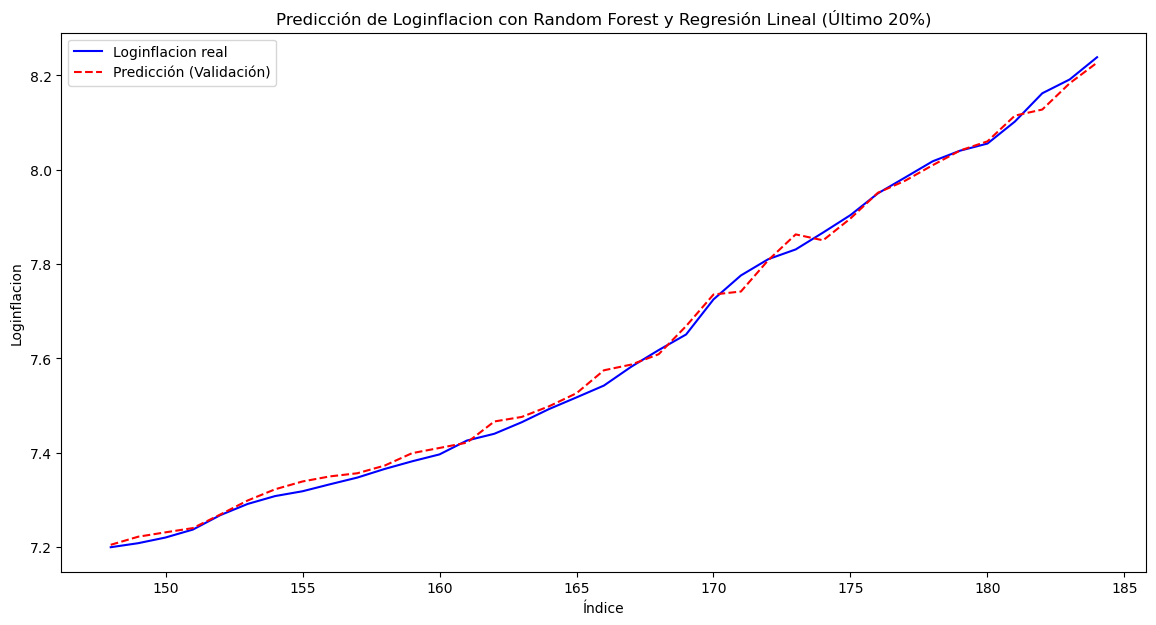

In [13]:
# Graficar solo el último 20% de la curva
plt.figure(figsize=(14, 7))
plt.plot(X_valid.index, y_valid, label='Loginflacion real', color='blue')
plt.plot(X_valid.index, y_valid_pred, label='Predicción (Validación)', color='red', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Loginflacion')
plt.title('Predicción de Loginflacion con Random Forest y Regresión Lineal (Último 20%)')
plt.legend()
plt.show()


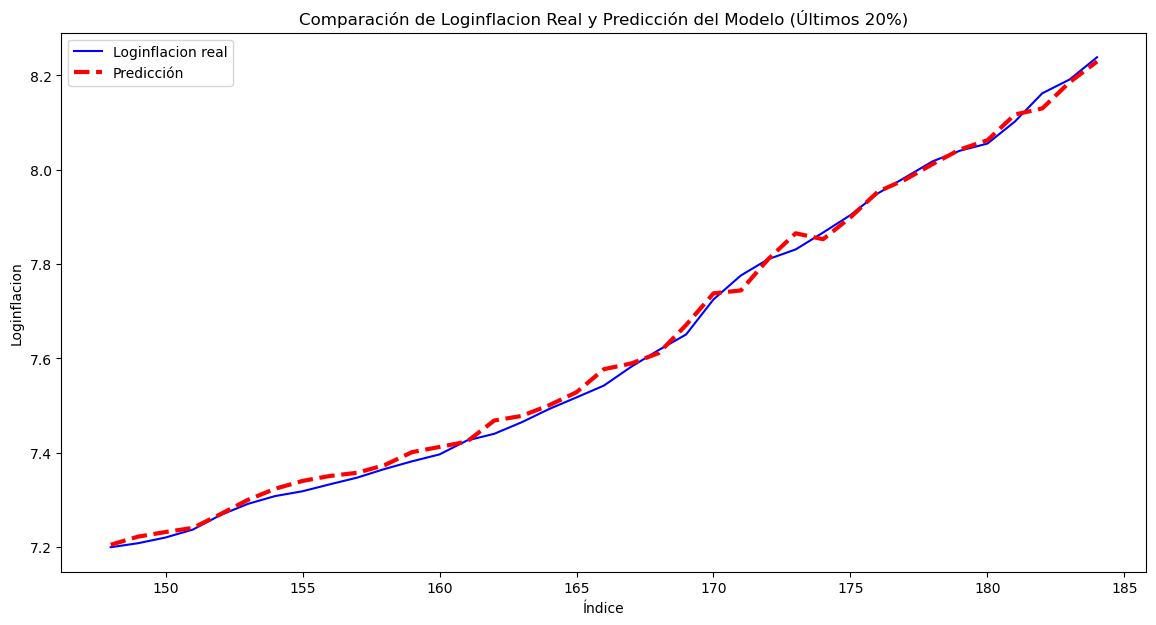

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Espacio de parámetros
params = {
    'sample_size_ratio': 2/3,  # Cantidad de datos de muestreo (2/3 del total de entrenamiento)
    'n_estimators': 10,  # Número de árboles en el random forest
    'random_state': 42,  # Semilla para la reproducibilidad
    'max_depth': 3,  # Profundidad máxima de los árboles
    'min_samples_split': 5,  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': 2,  # Número mínimo de muestras por hoja
    'n_splits': 5,  # Número de splits para bootstrapping
    'criterion': 'squared_error',  # Criterio de selección de los árboles ('mse' para regresión)
    'max_features': 'sqrt'  # Número de características a considerar para la mejor división
}

# Cargar datos

X = df_top_features.drop(columns=['loginflacion'])
y = df_top_features['loginflacion']

# Crear df_top_80
train_size = int(len(df_top_features) * 0.8)
df_top_80 = df_top_features[:train_size]
X_train = df_top_80.drop(columns=['loginflacion'])
y_train = df_top_80['loginflacion']

# Ajustar regresión lineal al conjunto de entrenamiento
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Obtener predicciones de la regresión lineal
y_train_lin_pred = lin_reg.predict(X_train)

# Almacenar las predicciones del modelo
train_predictions = np.zeros((params['n_splits'], len(X_train)))

# Realizar múltiples muestreos bootstrapping y entrenar el modelo
for i in range(params['n_splits']):
    bootstrapped_indices = np.random.choice(
        range(len(X_train)), 
        size=int(len(X_train) * params['sample_size_ratio']), 
        replace=True
    )
    X_train_bootstrap = X_train.iloc[bootstrapped_indices]
    y_train_bootstrap = y_train.iloc[bootstrapped_indices] - y_train_lin_pred[bootstrapped_indices]

    rf = RandomForestRegressor(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        random_state=params['random_state'],
        criterion=params['criterion'],
        max_features=params['max_features']
    )

    rf.fit(X_train_bootstrap, y_train_bootstrap)
    train_predictions[i] = rf.predict(X_train) + y_train_lin_pred

# Promediar las predicciones de todos los modelos
y_train_pred = train_predictions.mean(axis=0)

# Forecast de los siguientes meses equivalentes al último 20% de los datos
forecast_size = len(df_top_features) - train_size
X_forecast = X.iloc[train_size:train_size + forecast_size]
y_forecast_lin_pred = lin_reg.predict(X_forecast)
forecast_predictions = np.zeros((params['n_splits'], len(X_forecast)))

for i in range(params['n_splits']):
    forecast_predictions[i] = rf.predict(X_forecast) + y_forecast_lin_pred

# Promediar las predicciones de todos los modelos
y_forecast_pred = forecast_predictions.mean(axis=0)

# Graficar los últimos 20% de los datos de loginflacion con la predicción del modelo
plt.figure(figsize=(14, 7))
plt.plot(df_top_features.index[train_size:], y[train_size:], label='Loginflacion real', color='blue')
plt.plot(df_top_features.index[train_size:], y_forecast_pred, label='Predicción', color='red', linestyle='--', linewidth = 3)
plt.xlabel('Índice')
plt.ylabel('Loginflacion')
plt.title('Comparación de Loginflacion Real y Predicción del Modelo (Últimos 20%)')
plt.legend()
plt.show()


In [14]:
len(df_top_features)

185

In [15]:
185*0.2


37.0